<a href="https://colab.research.google.com/github/msft-jaiverma/AngularJS6-ADAL-GraphAPI/blob/master/FinalModel1_CreditRiskModel_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Loading the libraries
import numpy as np
# numpy stands for numerical python
import pandas as pd
# pandas stands for panel data
import matplotlib.pyplot as plt
# Matlab plot library

In [71]:
# read the data file
data = pd.read_csv("Churn_Modelling.csv")
# Check is the data is properly loaded
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
X = data.iloc[:,3:13].values
X
# Separate X and y
y = data.iloc[:,13].values
y

array([1, 0, 1, ..., 1, 1, 0])

In [73]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,2] = labelencoder.fit_transform(X[:,2]) # Gender
X[:,1] = labelencoder.fit_transform(X[:,1]) # Geography
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [74]:
# Get the library from sklearn.compose 
from sklearn.compose import ColumnTransformer
# OneHot Encoder has been applied to column 1
# I have given the ColumnTransformer function a name of my choice which is country
# The functionality has been passed onto the variable ct but still not applied on the data
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
# We shall now apply it on the data
X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

Convert the data into a dataframe for each of understanding. Replace the countries with X1, X2 and X3 the values we have after one-hot encoding. The countries have been replaced by X1, X2 and X3 which is a vector.
Example: France is now 1,0,0
Spain has been replaced by 0,0,1

In [75]:
# Call the pandas dataframe command to convert the data into a frame which can be used further
# Note you are converting data type from Numpy array to Pandas
X = pd.DataFrame(X,columns = ["X1", "X2", "X3", "Credit Score", "Gender", "Age","Tenure", "Balance", "NumofProducts", "HasCrCard", "IsActive Member", "Estimated Salary"])
X

,X1,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,1,0,0,619,0,42,2,0,1,1,1,101349
1,0,0,1,608,0,41,1,83807.9,1,0,1,112543
2,1,0,0,502,0,42,8,159661,3,1,0,113932
3,1,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,771,1,39,5,0,2,1,0,96270.6
9996,1,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,1,0,0,709,0,36,7,0,1,0,1,42085.6
9998,0,1,0,772,1,42,3,75075.3,2,1,0,92888.5


In [76]:
# From the datafram drop X1
# axis = 1 indicates where should Python look for the variable X1
# The answer is that it should look for X1 along the X-axis and hence axis is set to 1
# If looking along the Y-axis the axis should be set to 0
X = X.drop("X1", axis = 1)
X

,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,0,0,619,0,42,2,0,1,1,1,101349
1,0,1,608,0,41,1,83807.9,1,0,1,112543
2,0,0,502,0,42,8,159661,3,1,0,113932
3,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270.6
9996,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,0,0,709,0,36,7,0,1,0,1,42085.6
9998,1,0,772,1,42,3,75075.3,2,1,0,92888.5


In [77]:
#Split the dataset into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [78]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Standarized the train data
X_train = sc.fit_transform(X_train)

#Transform the test data, we do not need to standarized it.
X_test = sc.transform(X_test)

In [79]:
#Import Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense


In [80]:
#Initializing the Deep Learning Model
classifier = Sequential()

#Adding the input layer, input dimenssion = 11, first hidden layer has 6 units with random weight
classifier.add(Dense(units = 6, kernel_initializer= 'uniform', activation= 'relu', input_dim=11))

#Adding the 2nd hidden layer, 
classifier.add(Dense(units = 6, kernel_initializer= 'uniform', activation= 'relu'))

#Adding Output layer. Activation function is sigmoid as this is binary problem
classifier.add(Dense(units=1, kernel_initializer= 'uniform', activation= 'sigmoid'))




In [91]:
#Compiling DNN
classifier.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

#Fitting the DNN to the training set
classifier.fit(X_train, y_train, batch_size = 40, epochs = 200)





Epoch 1/200
200/200 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8636
Epoch 2/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8610
Epoch 3/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8613
Epoch 4/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8644
Epoch 5/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8664
Epoch 6/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8601
Epoch 7/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3229 - accuracy: 0.8715
Epoch 8/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8648
Epoch 9/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8583
Epoch 10/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3320 - accura

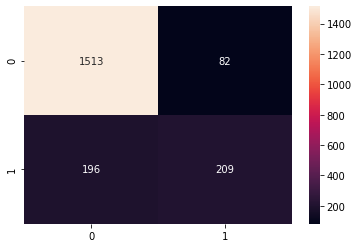

In [92]:
import seaborn as sns

#predicting the test set results
y_pred = classifier.predict(X_test)

#Taking 0.5 as cutoff value
y_pred = (y_pred > 0.5)

#Create Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '');



In [93]:
#Accuracy based on the diagonal 
(1513+209) / 2000

0.861